In [1]:
from scipy.constants import c, h, k as k_B

In [2]:
# In W m^-2 sr^-1 Hz^-1
def black_body(nu, T):
    return 2 * h * nu**3 * c**-2 * (np.exp(h * nu / (k_B * T)) - 1 )**-1

In [3]:
# 1 = 100 cm / 1 m
cm_per_m = 100

# f = c / \lambda
icm_per_Hz = c * cm_per_m

# 1 = (1 Jy) / (10−26 W m−2 Hz−1)
W_per_throughput_per_Hz_to_Jy = 1e26

In [4]:
firas_monopole_spectrum = np.loadtxt('/Users/daniel/Code/physics/cmb/firas_monopole_spec_v1.txt',
                                     skiprows=18, unpack=True)

In [5]:
frequency_icm, spectrum_MJy_per_sr, residual_kJy_per_sr, uncertainty_kJy_per_sr, galaxy_kJy_per_sr = firas_monopole_spectrum

In [6]:
np.diff(frequency_icm)

array([ 0.45,  0.46,  0.45,  0.45,  0.46,  0.45,  0.46,  0.45,  0.45,
        0.46,  0.45,  0.45,  0.46,  0.45,  0.46,  0.45,  0.45,  0.46,
        0.45,  0.45,  0.46,  0.45,  0.46,  0.45,  0.45,  0.46,  0.45,
        0.45,  0.46,  0.45,  0.46,  0.45,  0.45,  0.46,  0.45,  0.46,
        0.45,  0.45,  0.46,  0.45,  0.45,  0.46])

In [7]:
frequency = icm_per_Hz * frequency_icm
Nu = np.linspace(1, 700e9, 1e4)
T_cmb = 2.725
I_cmb = black_body(nu=Nu, T=T_cmb)
I_cmb_Jy = W_per_throughput_per_Hz_to_Jy * I_cmb

<Container object of 3 artists>

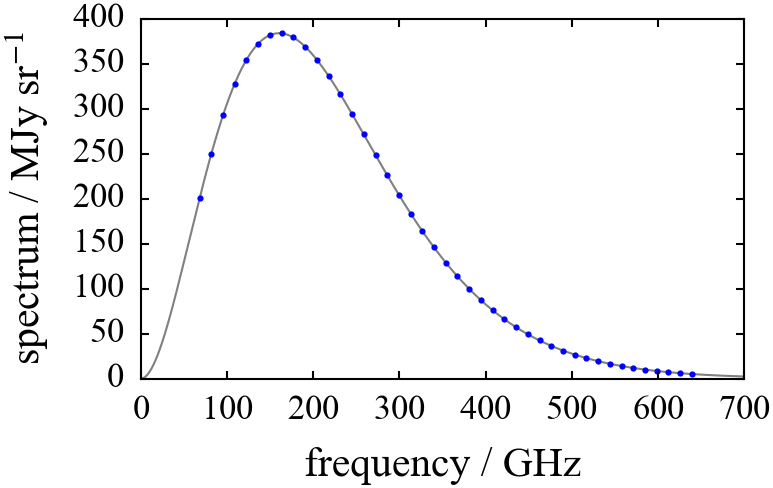

In [8]:
f_scale = 1e-9

fig, ax = plt.subplots()
ax.set_xlabel('frequency / GHz')
ax.set_ylabel('spectrum / MJy sr$^{-1}$')

ax.plot(f_scale * Nu, 1e-6 * I_cmb_Jy, color='gray')
ax.errorbar(f_scale * frequency, spectrum_MJy_per_sr, yerr=1e-3 * uncertainty_kJy_per_sr,
            marker='.', linestyle='none')



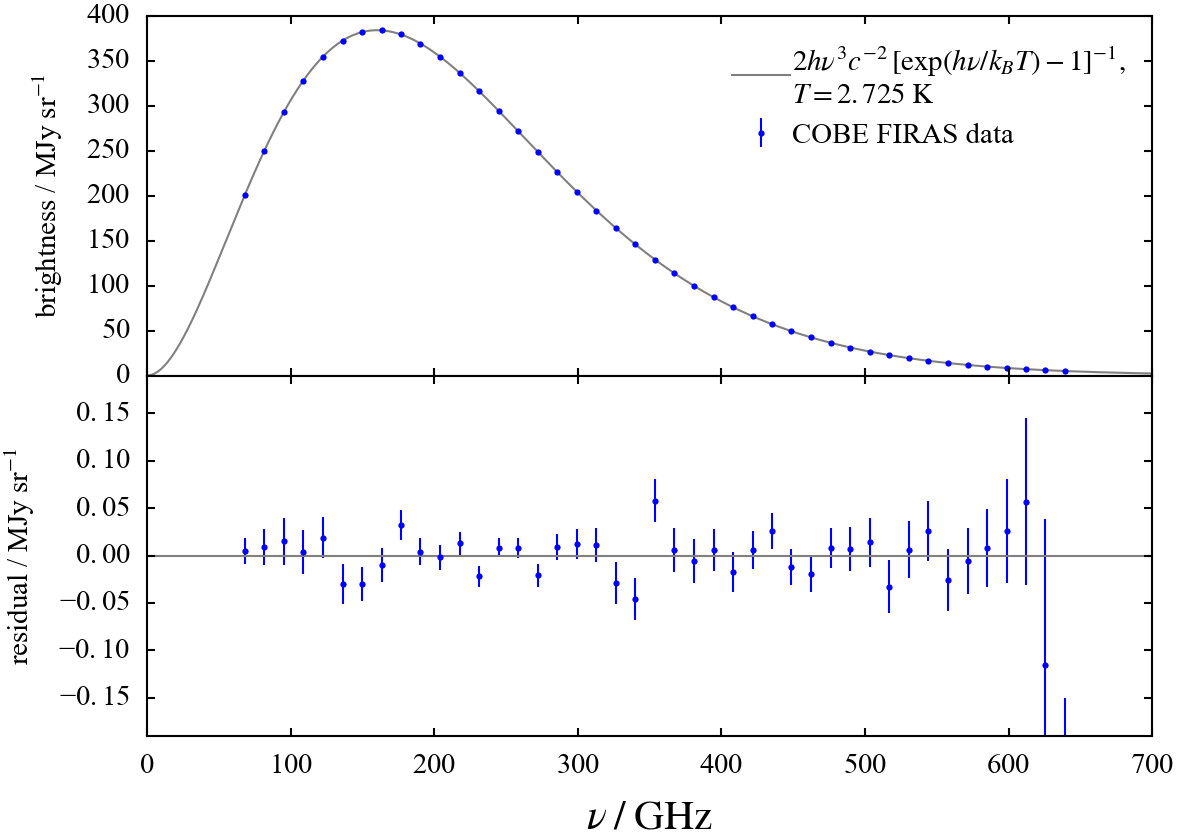

In [9]:
with plt.rc_context({'figure.subplot.hspace': 0}):
    fig, (spectrum_ax, residual_ax) = plt.subplots(2, 1, figsize=(5, 4), sharex=True)
    spectrum_ax.plot(f_scale * Nu, 1e-6 * I_cmb_Jy, color='gray',
                     label=r'$2 h \nu^3 c^{-2} \, [\exp (h \nu / k_B T) -1]^{-1},$' + '\n' + '$T = 2.725 \; \mathrm{K}$')
    spectrum_ax.errorbar(f_scale * frequency, spectrum_MJy_per_sr, yerr=1e-3 * uncertainty_kJy_per_sr,
                         marker='.', linestyle='none', color='blue', label='COBE FIRAS data')
    residual_ax.axhline(0, color='gray')
    residual_ax.errorbar(f_scale * frequency, 1e-3 * residual_kJy_per_sr, yerr=1e-3 * uncertainty_kJy_per_sr,
                         marker='.', linestyle='none', color='blue')
    
    spectrum_ax.tick_params(labelsize='xx-small')
    residual_ax.tick_params(labelsize='xx-small')
    spectrum_ax.set_ylim(0, 400)
    residual_ax.set_ylim(-0.19, 0.19);
    residual_ax.set_xlabel(r'$\nu \; / \; \mathrm{GHz}$')
    spectrum_ax.set_ylabel('brightness / MJy sr$^{-1}$', fontsize='xx-small')
    residual_ax.set_ylabel('residual / MJy sr$^{-1}$', fontsize='xx-small')
    spectrum_ax.legend(loc='upper right', fontsize='xx-small', numpoints=1)

fig.savefig('firas_monopole_spectrum.pdf', bbox_inches='tight')